In [1]:
import pandas as pd
import pandasql as ps
import numpy as np
import seaborn as sns

## Read data

In [104]:
original_alerts = pd.read_csv('csv/original_alerts.csv')
original_alerts

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,alert_code,source,detected_at,detected_year,status,status_desc,status_agreg,rejected_reason,rejected_reasons_agreg,cycle,biome_id,biome,state_id,state,city_id,city,area_ha
0,142626,142626,"{DETERB-AMAZONIA,SAD,SIRADX}",1/1/2020,2020,1036442,dismissed,not-validated,Duplicate,duplicity,2,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"6,680"
1,120740,120740,"{DETERB-AMAZONIA,SAD}",1/1/2020,2020,1730655,published,validated and refined,NaN,NaN,7,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"6,469"
2,27847,27847,"{DETERB-AMAZONIA,GLAD,SAD}",6/1/2019,2019,615450,published,validated and refined,NaN,NaN,1,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"4,451"
3,142627,142627,"{DETERB-AMAZONIA,SAD,SIRADX}",2/1/2020,2020,976059,dismissed,not-validated,Duplicate,duplicity,2,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"4,100"
4,142752,142752,"{DETERB-AMAZONIA,SAD,SIRADX}",1/1/2020,2020,1036839,rejected,not-validated,Cloud,non-observed,2,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"3,893"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305355,85129,85129,{GLAD},8/1/2019,2019,727187,rejected,not-validated,Others,other,1,18418,PANTANAL,18397,MATO GROSSO,17128,POCONÉ,0
305356,83239,83239,{GLAD},8/10/2019,2019,727130,rejected,not-validated,Others,other,1,18418,PANTANAL,18396,MATO GROSSO DO SUL,16507,CORUMBÁ,0
305357,112015,112015,{GLAD},8/18/2019,2019,727734,rejected,not-validated,Others,other,1,18418,PANTANAL,18397,MATO GROSSO,16135,BARÃO DE MELGAÇO,0
305358,78753,78753,{GLAD},12/24/2019,2019,704969,dismissed,not-validated,Duplicate,duplicity,1,18418,PANTANAL,18396,MATO GROSSO DO SUL,18239,AQUIDAUANA,-


### Explode sources

In [3]:
original_alerts = original_alerts[original_alerts['detected_year'].isin([2019, 2020])]
original_alerts.loc[:,'source'] = original_alerts['source'].str[1:-1].str.split(',')
exploded = original_alerts.explode('source')
exploded

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,id,alert_code,source,detected_at,detected_year,status,status_desc,status_agreg,rejected_reason,rejected_reasons_agreg,cycle,biome_id,biome,state_id,state,city_id,city,area_ha
0,142626,142626,DETERB-AMAZONIA,1/1/2020,2020,1036442,dismissed,not-validated,Duplicate,duplicity,2,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"6,680"
0,142626,142626,SAD,1/1/2020,2020,1036442,dismissed,not-validated,Duplicate,duplicity,2,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"6,680"
0,142626,142626,SIRADX,1/1/2020,2020,1036442,dismissed,not-validated,Duplicate,duplicity,2,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"6,680"
1,120740,120740,DETERB-AMAZONIA,1/1/2020,2020,1730655,published,validated and refined,NaN,NaN,7,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"6,469"
1,120740,120740,SAD,1/1/2020,2020,1730655,published,validated and refined,NaN,NaN,7,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"6,469"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305355,85129,85129,GLAD,8/1/2019,2019,727187,rejected,not-validated,Others,other,1,18418,PANTANAL,18397,MATO GROSSO,17128,POCONÉ,0
305356,83239,83239,GLAD,8/10/2019,2019,727130,rejected,not-validated,Others,other,1,18418,PANTANAL,18396,MATO GROSSO DO SUL,16507,CORUMBÁ,0
305357,112015,112015,GLAD,8/18/2019,2019,727734,rejected,not-validated,Others,other,1,18418,PANTANAL,18397,MATO GROSSO,16135,BARÃO DE MELGAÇO,0
305358,78753,78753,GLAD,12/24/2019,2019,704969,dismissed,not-validated,Duplicate,duplicity,1,18418,PANTANAL,18396,MATO GROSSO DO SUL,18239,AQUIDAUANA,-


### Disregard specific sources

In [4]:
exploded = exploded[~exploded['source'].isin(['IEF-MG', 'INEMA-BA'])]
exploded

,id,alert_code,source,detected_at,detected_year,status,status_desc,status_agreg,rejected_reason,rejected_reasons_agreg,cycle,biome_id,biome,state_id,state,city_id,city,area_ha
0,142626,142626,DETERB-AMAZONIA,1/1/2020,2020,1036442,dismissed,not-validated,Duplicate,duplicity,2,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"6,680"
0,142626,142626,SAD,1/1/2020,2020,1036442,dismissed,not-validated,Duplicate,duplicity,2,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"6,680"
0,142626,142626,SIRADX,1/1/2020,2020,1036442,dismissed,not-validated,Duplicate,duplicity,2,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"6,680"
1,120740,120740,DETERB-AMAZONIA,1/1/2020,2020,1730655,published,validated and refined,NaN,NaN,7,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"6,469"
1,120740,120740,SAD,1/1/2020,2020,1730655,published,validated and refined,NaN,NaN,7,18413,AMAZÔNIA,18411,PARÁ,18541,ALTAMIRA,"6,469"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305355,85129,85129,GLAD,8/1/2019,2019,727187,rejected,not-validated,Others,other,1,18418,PANTANAL,18397,MATO GROSSO,17128,POCONÉ,0
305356,83239,83239,GLAD,8/10/2019,2019,727130,rejected,not-validated,Others,other,1,18418,PANTANAL,18396,MATO GROSSO DO SUL,16507,CORUMBÁ,0
305357,112015,112015,GLAD,8/18/2019,2019,727734,rejected,not-validated,Others,other,1,18418,PANTANAL,18397,MATO GROSSO,16135,BARÃO DE MELGAÇO,0
305358,78753,78753,GLAD,12/24/2019,2019,704969,dismissed,not-validated,Duplicate,duplicity,1,18418,PANTANAL,18396,MATO GROSSO DO SUL,18239,AQUIDAUANA,-


### Pretify columns and values

In [6]:
# Columns
exploded = exploded.rename(columns={
    'biome': 'Biome',
    'source': 'Alert source',
    'detected_year': 'Detection year',
    'status_agreg': 'Validation result',
    'rejected_reason': 'Rejected reason'
})

# Values
exploded['Biome'] = exploded['Biome'].replace(to_replace={
    'AMAZÔNIA': 'Amazon',
    'CAATINGA': 'Caatinga',
    'CERRADO': 'Cerrado',
    'MATA ATLÂNTICA': 'Atlantic Forest',
    'PAMPA': 'Pampa',
    'PANTANAL': 'Pantanal',
})
exploded['Validation result'] = exploded['Validation result'].replace(to_replace={
    'not-validated': 'Not validated',
    'validated and refined': 'Validated and refined'
})

## Alert sources

In [7]:
df = exploded.groupby(['Biome','Alert source', 'Detection year']).size().reset_index(name='counts')
df_pivot = pd.pivot_table(df, values='counts', index=['Alert source'], columns=['Biome', 'Detection year'], fill_value='0', margins=True, aggfunc= 'sum').astype(int)
df_pivot
#df_pivot.to_csv('original_alerts_agg.csv')

Biome            Amazon         Atlantic Forest        Caatinga         \
Detection year     2019    2020            2019   2020     2019   2020   
Alert source                                                             
DETER-CERRADO       147     105               6     14      591    448   
DETERB-AMAZONIA   40412   23837               0      0        0      0   
GLAD              28075       0           12932  11172      861   2751   
SAD               60559   86480               0      0        0      0   
SAD-CAATINGA          0       0               0    259        0   6884   
SIPAM-SAR          3443       0               0      0        0      0   
SIRADX                0   11343               0      0        0      0   
SOS-INPE              0       0               0    880        0      0   
All              132636  121765           12938  12325     1452  10083   

Biome           Cerrado        Pampa      Pantanal            All  
Detection year     2019   2020  2019 2020     2019   2020          
Alert source                                                       
DETER-CERRADO     10920   6883     0    0       73     50   19237  
DETERB-AMAZONIA      83     48     0    0        2     10   64392  
GLAD               1366     16   611  666     1884  41453  101787  
SAD                 303   2688     0    0        2     63  150095  
SAD-CAATINGA          0   3463     0    0        0      0   10606  
SIPAM-SAR             0      0     0    0        0      0    3443  
SIRADX                0    112     0    0        0      0   11455  
SOS-INPE              0      0     0    1        0      0     881  
All               12672  13210   611  667     1961  41576  361896

## Validation result

In [8]:
exploded['Validation result'].value_counts()

Not validated            185490
Validated and refined    176382
in progress                  24
Name: Validation result, dtype: int64

In [9]:
exploded['Validation result'][exploded['Validation result'].isin(['in progress'])] = 'Not validated'

/tmp/ipykernel_216/211097297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exploded['Validation result'][exploded['Validation result'].isin(['in progress'])] = 'Not validated'


In [81]:
df = exploded.groupby(['Biome','Alert source', 'Validation result']).size().reset_index(name='counts')
df_pivot = pd.pivot_table(df, values='counts', index=['Alert source'], columns=['Validation result'], fill_value='0', margins=True, aggfunc= 'sum').astype(int)
df_pivot

Validation result,Not validated,Validated and refined,All
Alert source,,,
DETER-CERRADO,7225,12012,19237
DETERB-AMAZONIA,29853,34539,64392
GLAD,75105,26682,101787
SAD,57432,92663,150095
SAD-CAATINGA,4878,5728,10606
SIPAM-SAR,2071,1372,3443
SIRADX,8470,2985,11455
SOS-INPE,480,401,881
All,185514,176382,361896


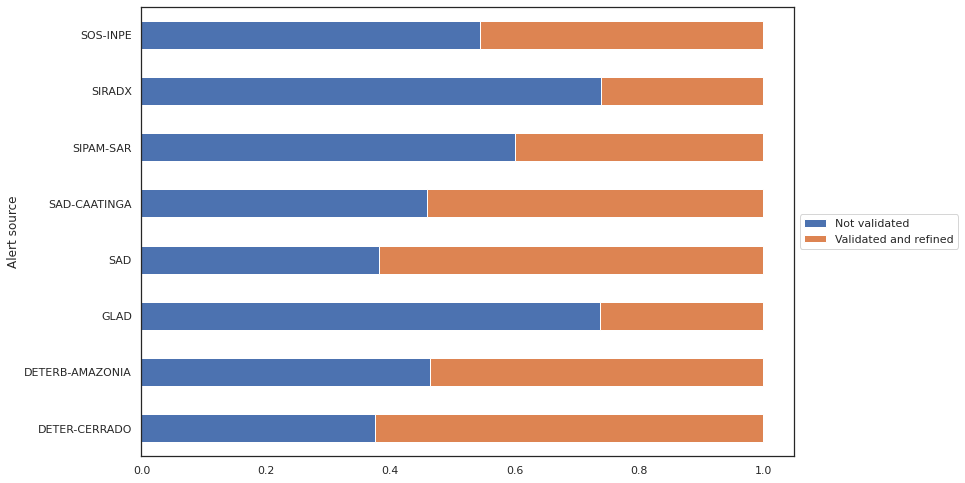

In [85]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
g = df_pivot.div( df_pivot.iloc[:,-1], axis=0 ).iloc[0:-1,0:-1].plot(kind='barh', stacked=True)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Rejected reason

In [76]:
empty_reason_mask = (exploded['Rejected reason'].isnull() & exploded['Validation result'].isin(['Dismissed', 'Rejected']))
exploded['Rejected reason'][empty_reason_mask] = 'Others'

/tmp/ipykernel_216/184589554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exploded['Rejected reason'][empty_reason_mask] = 'Others'


In [87]:
df = exploded.groupby(['Biome','Alert source', 'Rejected reason']).size().reset_index(name='counts')
df_pivot = pd.pivot_table(df, values='counts', index=['Alert source'], columns=['Rejected reason'], fill_value='0', margins=True, aggfunc= 'sum').astype(int)
df_pivot

Rejected reason,Antropic Before,Availability of images,Burned,Cloud,Degradation,Duplicate,Farming,Minimum area,Mining,Natural without change,Others,Planet,Quality,Reforestation,Seasonality,Shadow relief,All
Alert source,,,,,,,,,,,,,,,,,
DETER-CERRADO,234,3,95,1,15,1943,2221,28,4,0,1890,33,1,22,729,2,7221
DETERB-AMAZONIA,1748,2634,41,148,361,12462,7242,440,368,3,2745,52,7,35,1556,5,29847
GLAD,661,1816,37467,1190,150,5470,2426,276,68,2,6195,247,4,6550,11702,880,75104
SAD,3802,4312,107,529,1076,36819,2108,971,272,18,2486,133,28,13,4729,16,57419
SAD-CAATINGA,1070,23,132,0,131,1683,1114,2,0,28,3,3,0,59,621,9,4878
SIPAM-SAR,0,429,0,5,7,101,637,9,32,0,775,0,0,47,26,3,2071
SIRADX,868,21,2,14,173,7247,16,71,0,0,1,4,3,0,50,0,8470
SOS-INPE,297,0,39,0,0,83,2,0,0,0,0,0,0,4,55,0,480
All,8680,9238,37883,1887,1913,65808,15766,1797,744,51,14095,472,43,6730,19468,915,185490


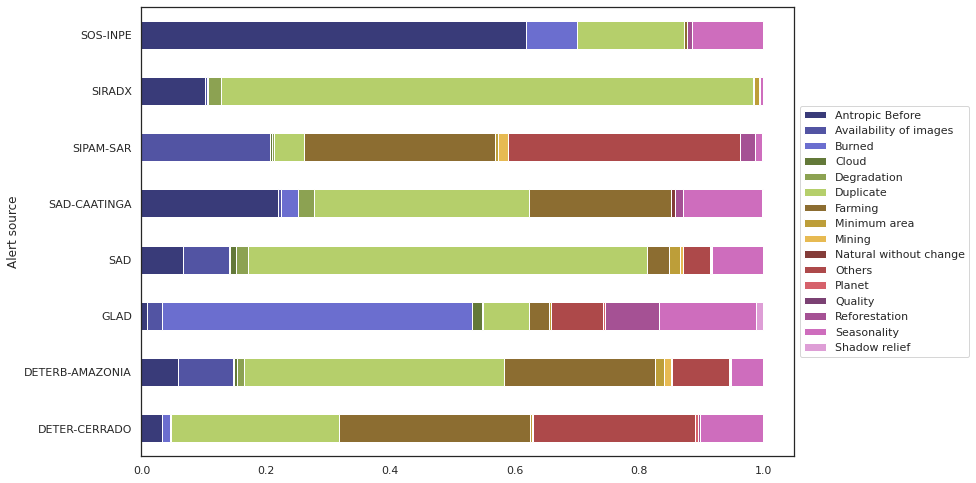

In [103]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sns.color_palette("pastel")
g = df_pivot.div( df_pivot.iloc[:,-1], axis=0 ).iloc[0:-1,0:-1].plot(kind='barh', stacked=True, colormap='tab20b')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))